### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Read csv file

In [3]:
data=pd.read_csv('happiness_score_dataset.csv')


In [4]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
data.shape

(158, 12)

In [6]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


### Checking for null values

In [7]:
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### Dropping Unnecessary column

In [8]:
data=data.drop(columns=['Country','Region','Happiness Rank'])

In [9]:
data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

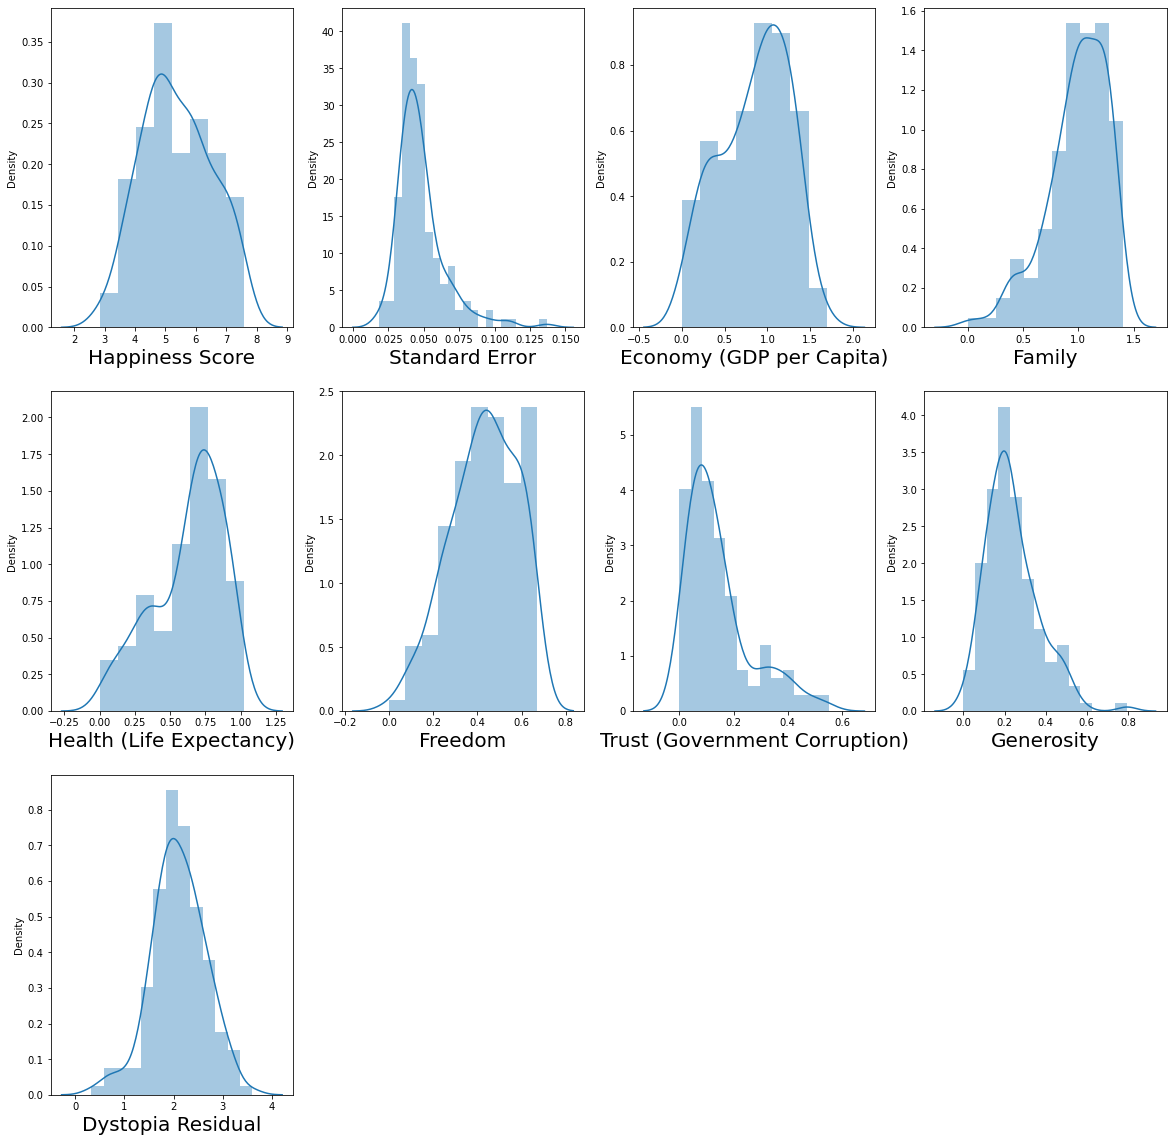

In [10]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

let's split the independent and the target variable

In [11]:
x=data.drop(columns=['Happiness Score'])
y=data['Happiness Score']

In [12]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [13]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

### Checking Skewness

In [14]:
x.skew().sort_values()

Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Economy (GDP per Capita)        -0.317575
Dystopia Residual               -0.238911
Generosity                       1.001961
Trust (Government Corruption)    1.385463
Standard Error                   1.983439
dtype: float64

There is skewness so we have to remove it using power transform

In [16]:
from sklearn.preprocessing import power_transform

In [17]:
x_new=power_transform(x)

In [18]:
x=pd.DataFrame(x_new,columns=x.columns)

In [19]:
x.skew().sort_values(ascending=False)

Trust (Government Corruption)    0.185965
Dystopia Residual                0.022925
Generosity                       0.013320
Standard Error                  -0.020092
Freedom                         -0.080728
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
dtype: float64

### Vizualizing Relationship

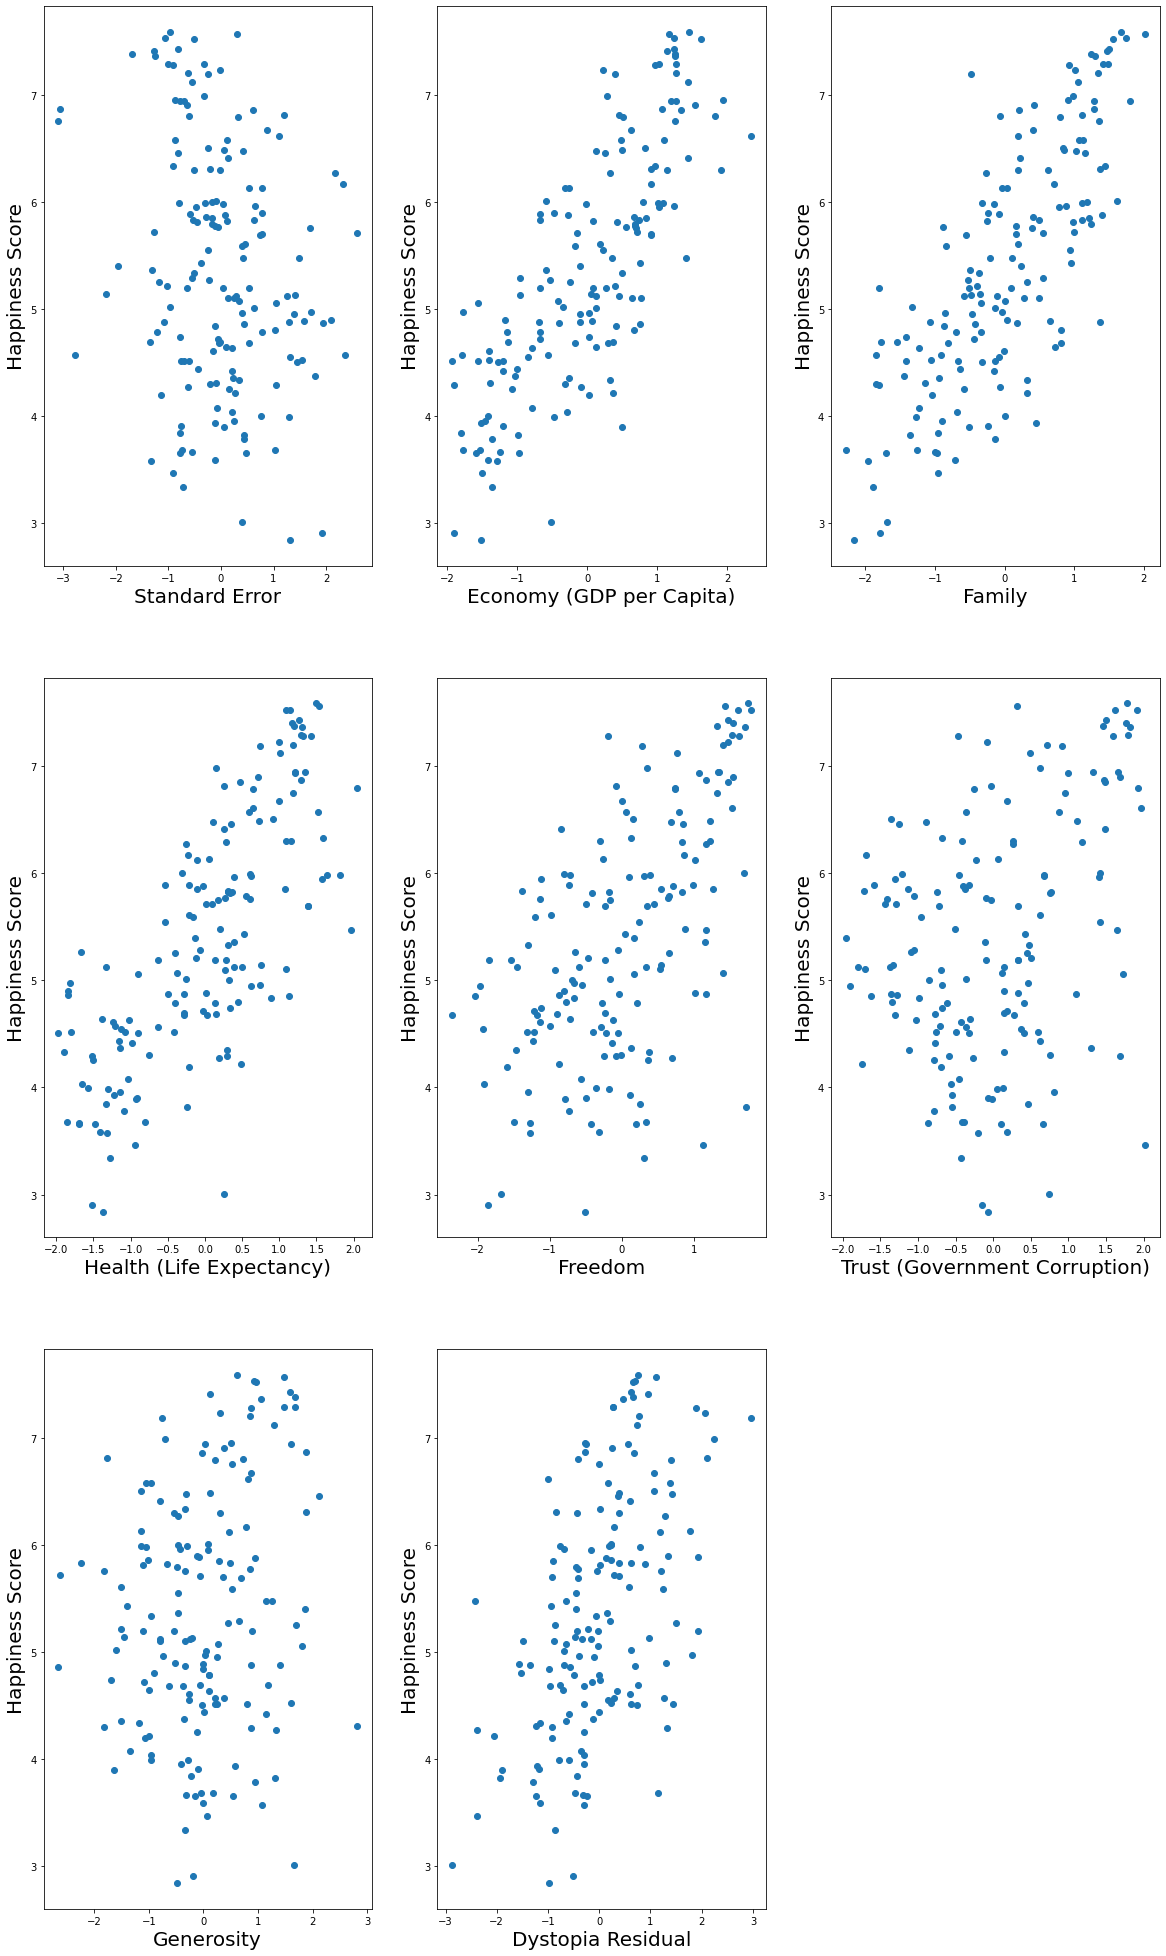

In [20]:
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber <=15:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Happiness Score',fontsize=20)
    plotnumber+=1
plt.show()

In [21]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [22]:
x_scaled

array([[-0.9722262 ,  1.44606101,  1.66920633, ...,  1.77399061,
         0.62239051,  0.75099154],
       [ 0.30934969,  1.17332111,  2.01213244, ...,  0.31599326,
         1.48099498,  1.11001108],
       [-1.06201662,  1.23983557,  1.73958573, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [ 0.39913742, -0.5134688 , -1.69066357, ...,  0.73891461,
         1.65933595, -2.86621557],
       [ 1.92690194, -1.89495386, -1.79680304, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [ 1.31032295, -1.52122584, -2.16039658, ..., -0.06732623,
        -0.49041465, -0.97664547]])

splitting data into training and test data

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=20239)

In [30]:
y_train.head()

42     6.123
66     5.689
87     5.102
142    3.896
119    4.517
Name: Happiness Score, dtype: float64

### Model instantiating and training

In [31]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

Adjusted R2 Score

In [34]:
regression.score(x_train,y_train)

0.9927129930767414

Let's check how well model fits the test data

In [35]:
regression.score(x_test,y_test)

0.9890633489596435

### Let's plot and visualize

In [36]:
y_pred=regression.predict(x_test)
y_pred

array([5.77049987, 5.49804001, 6.40547019, 6.86544389, 5.01006069,
       5.72005402, 3.75279721, 7.35153478, 6.03279305, 4.43157464,
       4.63809316, 4.95479811, 4.67956344, 5.58809821, 6.17651711,
       4.92466073, 4.44652176, 4.65143418, 4.57403773, 7.05694704,
       6.0349218 , 5.80794811, 7.06003929, 5.77764114, 4.3289691 ,
       5.77477395, 7.17143789, 3.9440646 , 6.80103375, 4.80906832,
       5.97604722, 7.34205525, 3.35181079, 5.0751026 , 7.78149164,
       5.87255768, 4.0220195 , 3.18197185, 5.19731921, 7.61079698])

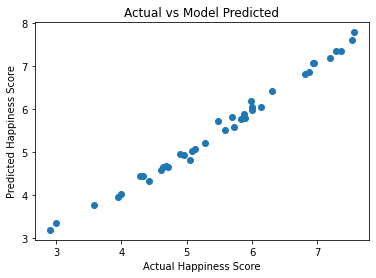

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Model Predicted')
plt.show()

### Using Lasso Regularization

In [38]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [39]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)

In [40]:
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [42]:
alpha=lasscv.alpha_
alpha

0.0004350225132354148

In [43]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0004350225132354148)

In [44]:
lasso_reg.score(x_test,y_test)

0.9891178859778754